# Práctica 1: Resolución de ecuaciones no lineales

## Importación de módulos

**IMPORTANTE:** Las cifras en las que se establecen la precisión son las cifras útiles, es decir, que no sólo tiene en cuenta los valores decimales, sino también los valores enteros. Por ello, si se quiere sólamente truncar o redondear el resultado, combiene que usemos otro método que no sea el uso de la precisión en el contexto.

Además, es importante que verifiquemos antes de usar el método de la bisección que $f(a)f(b)<0$ y en Newton-Raphson, comprobar que $f(x_0)f''(x_0) \neq 0$. Si se verifican dichas condiciones, podemos proceder a ejecutar el método. En todos los ejercicios se han comprobado las condiciones correspondientes.

In [1]:
%reload_ext version_information
%version_information numpy, matplotlib, sympy

Software versions
Python 3.10.4 64bit [GCC 11.2.1 20220127 (Red Hat 11.2.1-9)]
IPython 8.1.1
OS Linux 5.16.18 200.fc35.x86_64 x86_64 with glibc2.34
numpy 1.21.5
matplotlib 3.5.1
sympy 1.10
Fri Apr 22 15:47:02 2022 CEST

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp
from numpy import sign
from decimal import *
from scipy.optimize import fsolve
from sympy.solvers import solve, nsolve, solveset

In [3]:
x = sp.Symbol('x')

In [4]:
mporig = getcontext().prec
roundorig = getcontext().rounding
getcontext().rounding = ROUND_HALF_UP

## Ejercicio 1.
Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

Para solucionar este ejercicio, primero derivaremos la función $f(x)=x^3+4x^2-10$ y veremos que es monótona en el intervalo $[1,2]$. Finalmente, usaremos el Teorema de Bolzano para ver que existe al menos una raíz, y por ser monótona $f$ entonces es única. 

1) Definimos la función en Python.

In [5]:
def f_ej1(x):
    ''' función x^3+4x^2-10'''
    return x**3+4*x**2-10

2) Vemos el signo en  $a=1$ y $b=2$.

In [6]:
a = 1.
b = 2.
sign(f_ej1(a)),sign(f_ej1(b))

(-1.0, 1.0)

Por el Teorema de Bolzano, existe al menos una raíz en $[1,2]$. Veamos que es única.

3) Calculamos la derivada.

In [7]:
y = x**3+4*x**2-10
print(y.diff(x))

3*x**2 + 8*x


Vemos que $f'(x) = 3x^2 + 8x$, que evaluada en $[1,2]$ es estrictamente positiva, luego $f$ es estrictamente creciente, lo que implica que $f(x)=0$ existe y es única en $[1,2]$.

*Nota*: Otra forma de demostrarlo es dibujando el gráfico y viendo que efectivamente es así.

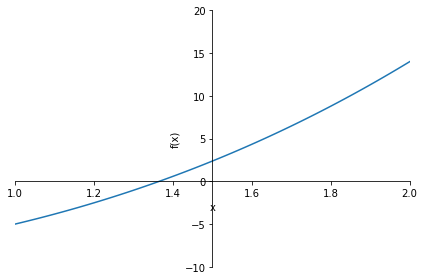

In [8]:
sp.plot(f_ej1(x),(x,a,b),xlim=(a,b),ylim=(-10,20))

Ahora apliquemos el método de la bisección tal y como pide: 

In [9]:
def metodoBiseccion(f,a,b,cifras=16,prec=10**(-16),nmax=100,num_iter=False):
    getcontext().prec = cifras+1
    tol = 10**(-cifras)
    niter = 0; sale =''
    sucesionBiseccion = []
    a,b = Decimal(a),Decimal(b)

    for k in range(nmax):
        niter = niter + 1;
        c = a+(b-a)/2 # equivalente a c = (a+b)/2
        sucesionBiseccion.append(c)

        if abs(f(c)) < prec:
            sale = 'precision'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c

        if b-a < tol:
            sale = 'tolerancia'
            break

    if sale == 'precision':
        print('Posiblemente solución exacta: ',c)
    elif niter < nmax:
        print('Aproximación solicitada: ',c)
    else:
        print('Se llegó al número máximo de iteraciones',c)
    if num_iter:
        print('Número de iteraciones reales en metodoBiseccion: ',niter)

    getcontext().prec = mporig
    return sucesionBiseccion

def numIterBiseccion(a,b,cifras):
    tol = 10**(-cifras)
    n = np.ceil(np.log((b-a)/tol)/np.log(2) - 1)
    print('Número de iteraciones: ', n)
    return n

sol_exact = sp.solve(f_ej1(x),x)[2]
print('Solución exacta con ', 3, ' cifras significativas:', sol_exact.evalf(n=3))
metodoBiseccion(f_ej1,a,b,3)
numIterBiseccion(a,b,5)

Solución exacta con  3  cifras significativas: 1.37
Aproximación solicitada:  1.365
Número de iteraciones:  16.0


16.0

In [10]:
def newtonRaphson(f,df,x0,cifras=16,prec=10**(-16),nmax=100,num_iter=False):
    getcontext().prec = cifras
    tol = 10**(-cifras)
    niter = 0; sale = ''
    sucesionNewtonRaphson = []
    x0 = Decimal(x0)

    for k in range(nmax):
        niter = niter + 1
        x1 = x0 - f(x0)/Decimal(df(x0))
        sucesionNewtonRaphson.append(x1)

        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break
        else:
            x0 = x1

    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif niter < nmax:
        print('Aproximación solicitada: ',x1)
    else:
        print('Se llegó al número máximo de iteraciones: ',x1)
    if num_iter:
        print('Número de iteraciones reales en newtonRaphson: ',niter)
        
    return sucesionNewtonRaphson

def df_ej1(x):
    return 3*x**2+8*x

print('Solución exacta con ', 3, ' cifras significativas:', sol_exact.evalf(n=3))
newtonRaphson(f_ej1,df_ej1,b,cifras=3)

Solución exacta con  3  cifras significativas: 1.37
Aproximación solicitada:  1.36


[Decimal('1.5'), Decimal('1.37'), Decimal('1.36'), Decimal('1.36')]

# Ejercicio 2.
2.- Encuentre una aproximación de la raíz cúbica de 25 con dos decimales exactos (tol =$10^{-2}$), usando el algoritmo de bisección.

Para ello, vamos a tomar una función, $g: \mathbb{R} \to \mathbb{R}$ tal que $g(25)=0$. La ecuación que buscamos es, siendo $y$ la variable, $y-\sqrt[3]{25}=0 \Longleftrightarrow g(y) = y^3-25=0$.

In [11]:
a = 0
b = 0

def f_ej2(y):
    return y**3-25

# Estimamos un intervalo válido de manera sencilla
while f_ej2(a)*f_ej2(b) >= 0 and b < 1000:
    a -= 1
    b += 1

sol_exact = sp.solve(f_ej2(x),x)[0]
print('Solución exacta con ', 2, ' cifras significativas:', sol_exact.evalf(n=2))
metodoBiseccion(f_ej2,a,b,cifras=2,nmax=100)

Solución exacta con  2  cifras significativas: 2.9
Aproximación solicitada:  2.92


[Decimal('0'),
 Decimal('1.5'),
 Decimal('2.25'),
 Decimal('2.63'),
 Decimal('2.82'),
 Decimal('2.91'),
 Decimal('2.96'),
 Decimal('2.94'),
 Decimal('2.93'),
 Decimal('2.92')]

# Ejercicio 3.
3.- Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.

In [12]:
# Por el motivo descrito al comienzo, haremos el ajuste suponiendo que la raíz no tiene más de 1 cifra entera
cifras = 5+1

i) $x^3-x-1 = 0$  en $[1,2]$.

In [13]:
def f_ej3_1(x):
    return x**3-x-1

def df_ej3_1(x):
    return 3*x**2-1

a,b = 1,2
x0 = 1.5
sol_exact = sp.solve(f_ej3_1(x),x)[2]
print('Solución exacta con ', 5, ' cifras significativas:', sol_exact.evalf(n=cifras))
newtonRaphson(f_ej3_1,df_ej3_1,x0,cifras)

Solución exacta con  5  cifras significativas: 1.32472
Aproximación solicitada:  1.32472


[Decimal('1.34783'),
 Decimal('1.32520'),
 Decimal('1.32472'),
 Decimal('1.32472')]

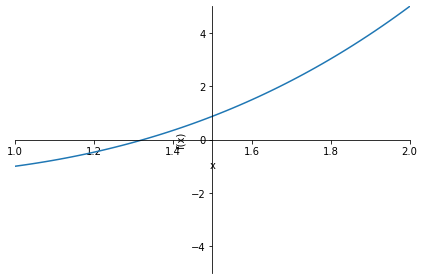

In [14]:
sp.plot(f_ej3_1(x),(x,a,b),xlim=(a,b),ylim=(-5,5))

ii) $3x=2+x^2-e^x$.

In [15]:
def f_ej3_2(x):
    return x**2-3*x+2-np.exp(x)

def f_ej3sym_2(x):
    return x**2-3*x+2-sp.exp(x)

def df_ej3_2(x):
    return 2*x**2-3-np.exp(x)

cifras = 5
a,b = 0,2
x0 = 1.5
#sol_exact = sp.solve(f_2(x),x)[0] <-- No hay solución con solve, luego usaremos nsolve para encontrarla
sol_exact = nsolve(f_ej3sym_2(x),x,x0)
print('Solución exacta con ', 5, ' cifras significativas:', sol_exact.evalf(n=cifras))
newtonRaphson(f_ej3_2,df_ej3_2,x0,cifras)

Solución exacta con  5  cifras significativas: 0.25753
Posiblemente solución exacta:  0.25754


[Decimal('-0.0869'),
 Decimal('0.25949'),
 Decimal('0.25771'),
 Decimal('0.25754')]

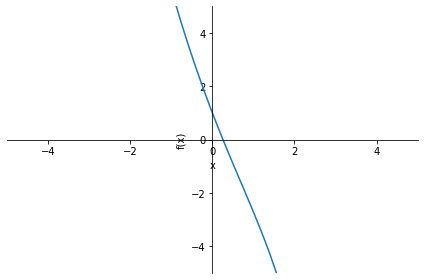

In [16]:
sp.plot(f_ej3sym_2(x),(x,-5,5),xlim=(-5,5),ylim=(-5,5))

iii) $x^2+10\, cos x+x=0$.

In [17]:
def f_ej3_3(x):
    return x**2+10*Decimal(np.cos(float(x)))+x

def f_ej3sym_3(x):
    return x**2+10*sp.cos(x)+x

def df_ej3_3(x):
    return 2*x-10*Decimal(np.sin(float(x)))+1

cifras = 5+1

Como podemos ver en la próxima gráfica, hay dos soluciones: una contenida en el intervalo $[-4,-2]$ y otra contenida en $[-2,0]$. Por ello, obtengamos ambas soluciones eligiendo una semilla apropiada en cada intervalo.

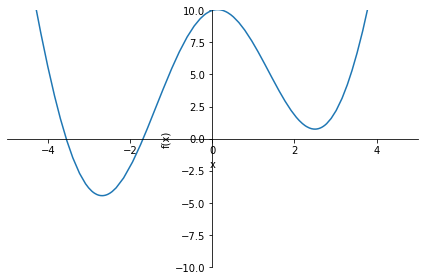

In [18]:
sp.plot(f_ej3sym_3(x),(x,-5,5),xlim=(-5,5),ylim=(-10,10))

In [19]:
a,b = -2,0
x0 = 0
#sol_exact = sp.solve(f_2(x),x)[0] #<-- No hay solución con solve, luego usaremos nsolve para encontrarla
sol_exact = nsolve(f_ej3sym_3(x),x,x0)
print('Solución exacta con ', 5, ' cifras significativas:', sol_exact.evalf(n=cifras))
newtonRaphson(f_ej3_3,df_ej3_3,x0,cifras)

Solución exacta con  5  cifras significativas: -1.68694
Posiblemente solución exacta:  -1.68694


[Decimal('-10'),
 Decimal('-6.66086'),
 Decimal('-1.21715'),
 Decimal('-1.68620'),
 Decimal('-1.68694')]

In [20]:
a,b = -4,-2
x0 = -4
#sol_exact = sp.solve(f_2(x),x)[0] #<-- No hay solución con solve, luego usaremos nsolve para encontrarla
sol_exact = nsolve(f_ej3sym_3(x),x,x0)
print('Solución exacta con ', 5, ' cifras significativas:', sol_exact.evalf(n=cifras))
newtonRaphson(f_ej3_3,df_ej3_3,x0,cifras)

Solución exacta con  5  cifras significativas: -3.56233
Aproximación solicitada:  -3.56233


[Decimal('-3.62496'),
 Decimal('-3.56431'),
 Decimal('-3.56233'),
 Decimal('-3.56233')]

# Ejercicio 4.
4.- Para la función  $ f(x)= 3 x^2+e^x-1$, 

i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas;

In [21]:
def f_ej4sym(x):
    return 3*x**2+sp.exp(x)-1

def f_ej4(x):
    return 3*x**2+Decimal(np.exp(float(x)))-1

sol_exact = nsolve(f_ej4sym(x),x,0)

a = 0; b = 1
cifras = 4

print('Solución exacta con ', 4, ' cifras significativas:', sol_exact.evalf(n=2))
metodoBiseccion(f_ej4,a,b,cifras)

Solución exacta con  4  cifras significativas: 0
Aproximación solicitada:  0.00006104


[Decimal('0.5'),
 Decimal('0.25'),
 Decimal('0.125'),
 Decimal('0.0625'),
 Decimal('0.03125'),
 Decimal('0.015625'),
 Decimal('0.0078125'),
 Decimal('0.0039063'),
 Decimal('0.0019532'),
 Decimal('0.0009766'),
 Decimal('0.0004883'),
 Decimal('0.00024415'),
 Decimal('0.00012208'),
 Decimal('0.00006104')]

Veamos primero si podemos aplicar el método de la bisección. Para ello, primero debe garantizar el Teorema de Bolzano:

In [22]:
print(sign(f_ej4(a))*sign(f_ej4(b)))

0


Como no se cumple que $f(a)f(b)<0$, no se cumple el Teorema de Bolzano luego no podemos aplicar el método de la bisección en $[0,1]$. Por otro lado, para ver el número de iteraciones que garantizan aproximarse con una tolerancia $\epsilon = 10^{-4}$, tan sólo llamaremos a la función previamente definida para ello:

In [23]:
numIterBiseccion(a,b,cifras)

Número de iteraciones:  13.0


13.0

*Nota*: Fácilmente podemos ver esto dibujando la gráfica.

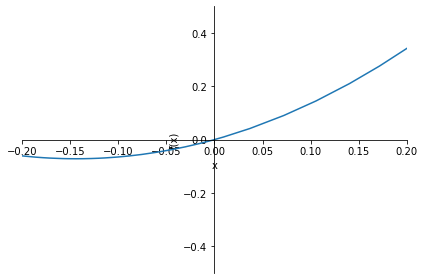

In [24]:
sp.plot(f_ej4sym(x),(x,-b,b),xlim=(-0.2,0.2),ylim=(-0.5,0.5))

ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas.  

In [25]:
def df_ej4(x):
    return 6*x+Decimal(np.exp(float(x)))

x0 = 0.

print('Solución exacta con ', 4, ' cifras significativas:', sol_exact.evalf(n=2))
newtonRaphson(f_ej4,df_ej4,x0,cifras,num_iter=True)

Solución exacta con  4  cifras significativas: 0
Aproximación solicitada:  0
Número de iteraciones reales en newtonRaphson:  1


[Decimal('0')]

# Ejercicio 5.
5.- Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):

*NOTA:* En este ejercicio, cuando se realiza el método de la bisección, siempre se verifica que $f(a)f(b)<0$.

i) $f(x)=x^7-x^4+2$

Solución con  16  cifras significativas: -1.000000000000000
Solución con  16  cifras significativas: -0.7131021458512931 - 0.9882318882715605*I
Solución con  16  cifras significativas: -0.7131021458512931 + 0.9882318882715605*I
Solución con  16  cifras significativas: 0.1519993353909364 - 1.019455946690631*I
Solución con  16  cifras significativas: 0.1519993353909364 + 1.019455946690631*I
Solución con  16  cifras significativas: 1.061102810460357 - 0.376384046559108*I
Solución con  16  cifras significativas: 1.061102810460357 + 0.376384046559108*I
Aproximación solicitada:  0.99999999999999995
Aproximación solicitada:  -0.99999999999999995
Aproximación solicitada:  1.999999999999999
Posiblemente solución exacta:  -1.000000000000000
Aproximación solicitada:  -1
Posiblemente solución exacta:  -1.000000000000000


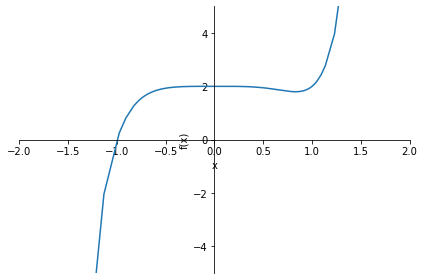

In [26]:
def f_ej5_1(x):
    return x**7-x**4+Decimal(2)

def df_ej5_1(x):
    return 7*x**6-4*x**3

sols = sp.solve(f_ej5_1(x),x)
for sol in sols:
    print('Solución con ', 16, ' cifras significativas:', sol.evalf(n=16))

metodoBiseccion(f_ej5_1,0,1)
metodoBiseccion(f_ej5_1,-1,0)
metodoBiseccion(f_ej5_1,1.3,2,cifras=15)
newtonRaphson(f_ej5_1,df_ej5_1,x0=1)
newtonRaphson(f_ej5_1,df_ej5_1,x0=-1)
newtonRaphson(f_ej5_1,df_ej5_1,x0=1.6)

sp.plot(f_ej5_1(x),(x,-10,10),xlim=(-2,2),ylim=(-5,5))

ii) $f(x)=x^7+\cos  x-3$.

Posiblemente solución exacta:  1.1454598072700087
Aproximación solicitada:  1.145459807270009


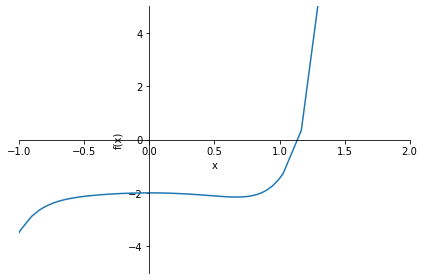

In [27]:
def f_ej5_2(x):
    return x**7+Decimal(np.cos(float(x)))-Decimal(3)

def f_ej5sym_2(x):
    return x**7+sp.cos(x)-Decimal(3)

def df_ej5_2(x):
    return 7*x**6-Decimal(np.sin(float(x)))

# sols = sp.solve(f_ej5sym_2(x),x) <-- No puede calcular las soluciones
metodoBiseccion(f_ej5_2,a=0,b=5)
newtonRaphson(f_ej5_2,df_ej5_2,x0=1.2)

sp.plot(f_ej5sym_2(x),(x,-10,10),xlim=(-1,2),ylim=(-5,5))

# Ejercicio 6.
6.- Aplicar los métodos de aceleración de la convergencia de Aitken y Steffensen (según los apuntes) a las sucesiones obtenidas para los distintos métodos programados en esta práctica y comparar los resultados. Para aplicar el método de aceleración de Steffensen, recuerde que para transformar cualquier ecuación de la forma  $ f(x)=0 $  en un problema de puntos fijos  $ g(x)=x $, la forma más simple puede ser definir  $g(x)=x \pm f(x)$.

In [28]:
def metodoAitken(aprox):
    '''
    Método de aceleración de convergencia de Aitken
    '''
    acelAitken = []
    n = len(aprox)
    
    for k in range(n-2):
        aproxacel = aprox[k]-(aprox[k+1]-aprox[k])**2/(aprox[k+2]-2*aprox[k+1]+aprox[k])
        acelAitken.append(aproxacel)
    
    print('Aproximación por aceleración de Aitken en ', n, ' iteraciones:', acelAitken[len(acelAitken)-1])
    return acelAitken

def metodoSteffensen(g,x0,niter):
    '''
    Método de aceleración de convergencia de Steffensen
    '''

    aproxtemp = [x0,g(x0),g(g(x0))]
    acelSteff = []

    for i in range(niter):
        x0 = aproxtemp[0]-(aproxtemp[1]-aproxtemp[0])**2/(aproxtemp[2]-2*aproxtemp[1]+aproxtemp[0])
        aproxtemp = [x0,g(x0),g(g(x0))]
        acelSteff = acelSteff + [aproxtemp[0]]

    print('Aproximación por aceleración de Steffensen en ', niter, ' iteraciones:', acelSteff[len(acelSteff)-1])
    return acelSteff

Primero transformemos las funciones en problemas de punto fijo y compararemos los resultados:

In [29]:
# EJERCICIO 1
def g_ej1(x):
    return x - f_ej1(x)

a,b = 1,2
x0 = 1
xn_ej1_biseccion = metodoBiseccion(f_ej1,a,b,num_iter=True)
xn_ej1_nr = newtonRaphson(f_ej1,df_ej1,x0,num_iter=True)
xn_ej1_aitken_biseccion = metodoAitken(xn_ej1_biseccion)
xn_ej1_aitken_nr = metodoAitken(xn_ej1_nr)
xn_ej1_steffensen = metodoSteffensen(g_ej1,x0,10)

int_list = [max (xn_ej1_biseccion), max (xn_ej1_nr), max (xn_ej1_aitken_biseccion), max (xn_ej1_aitken_nr), max (xn_ej1_steffensen)]

Se llegó al número máximo de iteraciones 1.3652300134140969
Número de iteraciones reales en metodoBiseccion:  100
Posiblemente solución exacta:  1.365230013414097
Número de iteraciones reales en newtonRaphson:  5
Aproximación por aceleración de Aitken en  100  iteraciones: 1.365230013414097
Aproximación por aceleración de Aitken en  5  iteraciones: 1.365230013414097
Aproximación por aceleración de Steffensen en  10  iteraciones: 1.3652300134140969


Comparemos visualmente las soluciones:

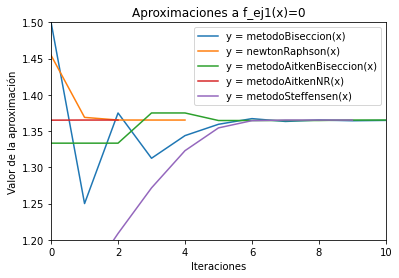

In [30]:
fig, ax = plt.subplots();
ax.plot([i for i in range(len(xn_ej1_biseccion))],xn_ej1_biseccion, label = "y = metodoBiseccion(x)");
ax.plot([i for i in range(len(xn_ej1_nr))],xn_ej1_nr, label = "y = newtonRaphson(x)");
ax.plot([i for i in range(len(xn_ej1_aitken_biseccion))],xn_ej1_aitken_biseccion, label = "y = metodoAitkenBiseccion(x)");
ax.plot([i for i in range(len(xn_ej1_aitken_nr))],xn_ej1_aitken_nr, label = "y = metodoAitkenNR(x)");
ax.plot([i for i in range(len(xn_ej1_steffensen))],xn_ej1_steffensen, label = "y = metodoSteffensen(x)");
ax.legend(loc=1);
ax.set_xlabel('Iteraciones')
ax.set_ylabel('Valor de la aproximación')
ax.set_title('Aproximaciones a f_ej1(x)=0')
plt.ylim([1.2, 1.5])
plt.xlim([0, 10])
plt.show()


Como podemos observar en la gráfica, los métodos que han conseguido una convergencia más rápida serían tanto el método de Newton-Raphson, como el de Newton-Raphson acelerado por Aitken, el cual consigue aproximar muy bien el resultado desde la primera iteración. Le sigue de cerca el método de la bisección acelerada por Aitken el de la bisección. Finalmente, vemos que el que peor ha funcionado es el método de Steffensen usado sobre un método de iteración funcional de punto fijo.

Esto se debe a que los métodos de aceleración empleados sirven para mejorar la convergencia lineal, sin embargo, Newton-Raphson tiene una convergencia cuadrática, por lo que ofrece los mejores resultados para encontrar raíces simples.

# Ejercicio 7.
 7.- Programar el método de Newton-Raphson acelerado, partiendo de cierto $x_0$ adecuado: $$x_{n+1}=x_n - m\frac{f(x_n)}{f'(x_n)}, \quad n=0,1,2,\ldots$$ para el caso de una raíz múltiple (de multiplicidad $m\in\mathbb{N}$) de una ecuación del tipo $f(x)=0$ y comparar los resultados
con los que se obtienen mediante el empleo de los métodos de aceleración habituales de Aitken y Steffensen (según los apuntes).

In [31]:
def newtonRaphsonAcelerado(f,df,x0,m,cifras=16,prec=10**(-16),nmax=100,num_iter=False):
    '''
    Implementación del algoritmo de Newthon-Raphson acelerado
    para raíces múltiples
    '''
    x0 = Decimal(x0); m = Decimal(m)
    niter = 0; sale =''
    iter_list = []
    getcontext().prec = cifras
   
    tol = 10**(-cifras)
    for k in range(nmax):
        niter = niter + 1;
        x1 = x0 - m*f(x0)/Decimal(df(x0))
        iter_list.append(x1)
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break
        else:
            x0 = x1

    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif niter < nmax:
        print('Aproximación solicitada: ', x1)
    else:
        print('Se llegó al número máximo de iteraciones', x1)
    
    getcontext().prec = mporig
    if num_iter:
        print('Número de iteraciones reales en Newton-Raphson acelerado: ',niter)
    print('Multiplicidad de la raíz: ',m)

    return iter_list

Para probar dicho método, tomaré la función $f(x)=(x-1)^3(x+1)^2(x+3)=x^6+2x^5-5x^4-4x^3+7x^2+2x-3$, pues posee raíces simples, dobles y múltiples que serán de gran utilidad para comparar resultados en este ejercicio.

Raíz m=1:
Posiblemente solución exacta:  1.250000000000000
Número de iteraciones reales en newtonRaphson:  6
Posiblemente solución exacta:  1.2500000000000000
Número de iteraciones reales en Newton-Raphson acelerado:  6
Multiplicidad de la raíz:  1

Raíz m=2:
Posiblemente solución exacta:  2.499999994489037
Número de iteraciones reales en newtonRaphson:  27
Posiblemente solución exacta:  2.499999999998831
Número de iteraciones reales en Newton-Raphson acelerado:  4
Multiplicidad de la raíz:  2

Raíz m=3:
Posiblemente solución exacta:  3.750002408814985
Número de iteraciones reales en newtonRaphson:  29
Posiblemente solución exacta:  3.750000250272676
Número de iteraciones reales en Newton-Raphson acelerado:  3
Multiplicidad de la raíz:  3


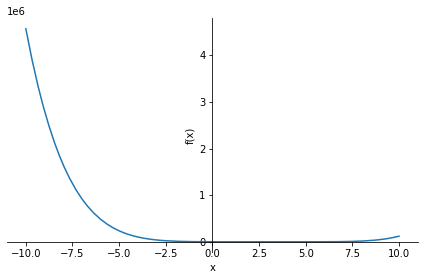

In [32]:
def f_ej7(x):
    return (x-Decimal(1.25))*((x-Decimal(2.5))**2)*((x-Decimal(3.75))**3)

def df_ej7(x):
    return Decimal(6.0)*x**5 - Decimal(87.5)*x**4 + Decimal(500.0)*x**3 - Decimal(1394.53125)*x**2 + Decimal(1889.6484375)*x - Decimal(988.76953125)

x0_1, x0_2, x0_3 = 1,2,4
print('Raíz m=1:')
newtonRaphson(f_ej7,df_ej7,x0_1,num_iter=True)
newtonRaphsonAcelerado(f_ej7,df_ej7,x0_1,cifras=17,m=1,num_iter=True)
print('\nRaíz m=2:')
newtonRaphson(f_ej7,df_ej7,x0_2,num_iter=True)
newtonRaphsonAcelerado(f_ej7,df_ej7,x0_2,m=2,num_iter=True)
print('\nRaíz m=3:')
newtonRaphson(f_ej7,df_ej7,x0_3,num_iter=True)
xn_ej7_nra = newtonRaphsonAcelerado(f_ej7,df_ej7,x0_3,m=3,num_iter=True,nmax=1000)
sp.plot(f_ej7(x))



Como podemos ver, este nuevo método mejora sustancialmente la velocidad de convergencia cuando se trata de una raíz múltiple. Ahora comparémoslo con los métodos de aceleración de Aitken y Steffensen:

In [33]:
def g_ej7(x):
    return x - f_ej7(x)

metodoAitken(xn_ej7_nra)
metodoSteffensen(g_ej7,x0_3,10)

Aproximación por aceleración de Aitken en  3  iteraciones: 3.749987618381641290370371483
Aproximación por aceleración de Steffensen en  10  iteraciones: 3.753500119816468475670897307


[Decimal('3.879932298109445516990014855'),
 Decimal('3.835658032792054488530066100'),
 Decimal('3.807526461656000416253413510'),
 Decimal('3.788742342710449315574118791'),
 Decimal('3.776060744540760599508845590'),
 Decimal('3.767494779830419094285291221'),
 Decimal('3.761722285033051553547621544'),
 Decimal('3.757842740279513365774550485'),
 Decimal('3.755241373654727806986869252'),
 Decimal('3.753500119816468475670897307')]

Como podemos ver, Aitken converge mejor que la sucesión original y que Steffensen. El problema es que muchas veces debemos tener **mucho** cuidado con la semilla que tomemos, pues la raíz a la que converja nuestro método puede cambiar radicalmente.

# Ejercicio 8.
8.- Programar el conocido algoritmo de Horner para la evaluación de un polinomio y emplearlo de forma reiterativa para el cálculo del desarrollo de Taylor de orden $ n$ de un polinomio cualquiera. Aprovecharlo también para programar una versión especial del método de Newton-Raphson para polinomios, evaluando tanto  $ p(x_k ) $ como $ p'(x_k)$ mediante el citado algoritmo y aplicarlo para aproximar alguna de las raíces reales del siguiente polinomio

$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
(siendo $d_0, d_1, \ldots, d_7$ los dígitos ordenados de su DNI, pasaporte o tarjeta de residente).

Programar y construir también una sucesión de Sturm para dicho polinomio.

In [34]:
DNI = [1,2,3,4,5,6,7,8]

def p(x,coefs):
    return sum([Decimal(coefs[i])*x**i for i in range(len(coefs))])

def mi_polinomio(x):
    x = Decimal(x)
    return Decimal(2) + Decimal(4)*x + Decimal(4)*x**2 + x**3 + x**4 + Decimal(2)*x**5 + Decimal(2)*x**6 + Decimal(8)*x**7

def dp(x):
    return 4 + 8*x + 3*x**2 + 4*x**3 + 10*x**4 + 12*x**5 + 56*x**6

def algoritmoHorner(x0,p):
    '''
    Implementación del algoritmo de Horner
    '''
    x0 = Decimal(x0)
    p.reverse()
    q = [p[0]]
    resto = 0
    
    for i in range(1,len(p)):
        resto = p[i]+q[i-1]*x0
        q.append(resto)
    
    resto = q.pop()
    q.reverse()

    return resto, q

def hornerTaylor(x,x0,p,orden):
    '''
    Implementación de la obtención del polinomio de Taylor
    usando el algoritmo de Horner para el cálculo de los coeficientes
    '''
    coefs = p
    x = Decimal(x)
    resultado = Decimal(0)

    for i in range(orden):
        r, coefs = algoritmoHorner(x0,coefs)
        resultado += r * (x-x0)**i

    return resultado

hornerTaylor(3,2,DNI,orden=len(DNI))


Decimal('19598')

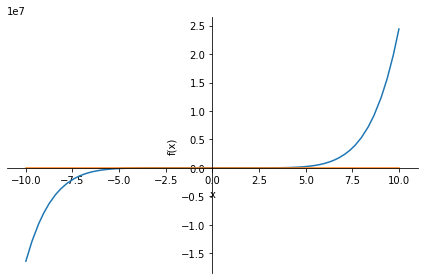

[-1.06636816+1.06875939j -1.06636816-1.06875939j -1.34260126+0.j
 -0.0932829 +1.11102948j -0.0932829 -1.11102948j  0.83095169+0.6008156j
  0.83095169-0.6008156j ]
Aproximación solicitada:  -1.342601258444345
Número de iteraciones reales en newtonRaphsonHorner:  9


[Decimal('-1.857142857142857'),
 Decimal('-1.627714043381176'),
 Decimal('-1.458235847126949'),
 Decimal('-1.366923776720673'),
 Decimal('-1.343850553541834'),
 Decimal('-1.342604687917873'),
 Decimal('-1.342601258470245'),
 Decimal('-1.342601258444345'),
 Decimal('-1.342601258444345')]

In [35]:
def newtonRaphsonHorner(coefs,x0,cifras=16,prec=10**(-16),nmax=100,num_iter=False):
    '''
    Implementación del algoritmo de Newthon-Raphson para 
    el caso de un polinomio usando el algoritmo de Horner
    '''
    getcontext().prec = cifras
    tol = 10**(-cifras)
    niter = 0; sale = ''
    orden = 2; dp = 0
    sucesionNewtonRaphson = [];
    x0 = Decimal(x0)      

    for k in range(nmax):
        niter = niter + 1
       # Hacemos dp a partir del algoritmo de Horner
        p, der_coefs = algoritmoHorner(x0,coefs)
        dp, der_coefs = algoritmoHorner(x0,der_coefs)
        # Calculamos la aproximación
        x1 = x0 - p/dp
        p, der_coefs = algoritmoHorner(x1,coefs)
        sucesionNewtonRaphson.append(x1)

        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(p) < prec:
            sale = 'precision'
            break
        else:
            x0 = x1
            
        der_coefs = coefs

    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif niter < nmax:
        print('Aproximación solicitada: ',x1)
    else:
        print('Se llegó al número máximo de iteraciones: ',x1)
    if num_iter:
        print('Número de iteraciones reales en newtonRaphsonHorner: ',niter)
        
    return sucesionNewtonRaphson

DNI_R = DNI[::-1]   # Invertimos el polinomio para evaluarlo en numpy
sp.plot(p(x,DNI),x)
print(np.roots(DNI_R))
newtonRaphsonHorner(DNI,-1,num_iter=True)

Ahora obtengamos la sucesión de Sturm para mi polinomio:

In [36]:
def sturm(polinomio,x):
    '''
    Método para obtener una sucesión de Sturm para un polinomio
    '''
    
    p0 = polinomio
    p1 = sp.Poly(sp.diff(polinomio,x))
    
    sucesion = [p0,p1]
    p = p0 % p1
    p = sp.Poly(-p)
    while((sp.degree(p,x) != -sp.oo) or (p == p0)):
        sucesion.append(p)
        p0,p1 = p1,p
        p = p0 % p1
        p = sp.Poly(-p)
    
    return sucesion

pol = sp.Poly(p(x,DNI),x)
sturm(pol,x)

[Poly(2.0*x**7 + 4.0*x**6 + 4.0*x**5 + 1.0*x**4 + 1.0*x**3 + 2.0*x**2 + 2.0*x + 8.0, x, domain='RR'),
 Poly(14.0*x**6 + 24.0*x**5 + 20.0*x**4 + 4.0*x**3 + 3.0*x**2 + 4.0*x + 2.0, x, domain='RR'),
 Poly(-0.163265306122449*x**5 + 0.387755102040817*x**4 - 0.408163265306122*x**3 - 1.30612244897959*x**2 - 1.55102040816327*x - 7.91836734693878, x, domain='RR'),
 Poly(-120.96875*x**4 + 251.125*x**3 + 587.999999999999*x**2 + 1218.875*x + 2774.625, x, domain='RR'),
 Poly(1.10039926882466*x**3 + 2.71385080229817*x**2 + 4.80383507352628*x + 6.79849186910784, x, domain='RR'),
 Poly(239.015477980997*x**2 + 432.457919896258*x + 620.071103829689, x, domain='RR'),
 Poly(-0.641198527280495*x - 4.92318313478669, x, domain='RR'),
 Poly(-11390.3313618994, x, domain='RR')]